In [1]:
import xarray as xr
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys

path = '/home/akazemi3/Desktop/MB_Lab_Project/'
sys.path.append(path)
from analysis.neural_data_regression.tools.regression import *
from tools.processing import *
from tools.loading import *

import pandas as pd
import seaborn as sns

# Plot Distributions

In [2]:
def plot_data(data_dict,legend_name_dict,file_name,palette,regression='Ridge(alpha=0)',subject=None,show_legend=True):

    root_path = '/data/atlas/model_scores'
    #models = ['alexnet','model_final_wrong_filterss','model_final_correct_filters']
    df = pd.DataFrame()
    
    fig = plt.figure(figsize=(8,4),dpi=200)
    
    for model, regions in data_dict.items():
        
        print(model)
        
        for region in regions:

            data = xr.open_dataset(os.path.join(root_path,f'{model}_{regression}'))
            if subject is not None:
                r_values = list(data.where((data.region == region)&(data.subject == subject),drop=True).r_value.values)
            else:
                r_values = list(data.where((data.region == region),drop=True).r_value.values)

                #print(sum(r_values)/len(r_values))
            df_tmp =  pd.DataFrame({'scores':r_values,
                                    'model':[model for i in range(len(r_values))],#+ f'_{alpha}'
                                    'region':[region for i in range(len(r_values))]})
            df = pd.concat([df,df_tmp])

                
    
    if legend_name_dict is not None:
        df.model = df.model.map(legend_name_dict)
    
    ax = sns.violinplot(x=df['region'],y=df['scores'],hue=df['model'],
                        linewidth=1,errorbar='sd',errwidth = 1,capsize=0.05)#,palette=palette) #,

    
    if show_legend:
        plt.legend(loc='upper left',prop={'size': 8}) 
    else: 
        plt.legend([],[], frameon=False)
    plt.ylabel(ylabel='Correlation (Pearson r)')        
        
    if file_name is not None:
        plt.savefig(f'/home/akazemi3/Desktop/MB_Lab_Project/results/encoding_performance/{file_name}.png')

# Plot Means 

In [3]:
def plot_data_means(data_dict,legend_name_dict,file_name,alphas,show_legend=False):

    root_path = '/data/atlas/model_scores'
    df = pd.DataFrame()
    
    fig = plt.figure(figsize=(8,4),dpi=200)
    
    index = 0
    
    for model, regions in data_dict.items():
        
        for alpha in alphas:
            regression = f'Ridge(alpha={alpha})' 
            for region in regions:

                data = xr.open_dataset(os.path.join(root_path,f'{model}_{regression}'))
                r_values = data.where(data.region == region,drop=True).r_value.values
                mean_r = np.mean(r_values)
                df_tmp =  pd.DataFrame({'mean_score':mean_r,
                                        'alpha':f'{alpha}',
                                        'model':model,
                                        'region':region},index=[index])
                df = pd.concat([df,df_tmp])

                index+=1
    
    if legend_name_dict is not None:
        df.model = df.model.map(legend_name_dict)
    
    ax = sns.relplot(data=df,x='model',y='mean_score',hue='alpha',col='region',size='alpha')#,palette=palette) #,

    
    if show_legend:
        plt.legend(loc='right',prop={'size': 6},bbox_to_anchor=(1.3, 0.4)) 
    else: 
        plt.legend([],[], frameon=False)
    
    plt.ylabel(ylabel='Correlation (Pearson r)')        
    if file_name is not None:
        plt.savefig(f'/home/akazemi3/Desktop/MB_Lab_Project/results/encoding_performance/{file_name}.png')

# Monkey V1 & V2

In [5]:
data_dict = {'name':'movshon.FreemanZiemba2013public.','regions':['V1','V2']}
plot_data(data_dict)

TypeError: plot_data() missing 4 required positional arguments: 'legend_name_dict', 'file_name', 'alpha', and 'palette'

# Monkey V4 & IT

In [64]:
activations_data = xr.open_dataset(os.path.join('/data/atlas/activations/alexnet_untrained_mp_majajhong'))    

activations_data = torch.Tensor(activations_data.sortby('stimulus_id', ascending=True)['x'].values)
activations_data.shape

torch.Size([3200, 256])

In [56]:
activations_data.shape

torch.Size([3200, 9216])

model_final_mp_majajhong
alexnet_mp_majajhong
alexnet_untrained_mp_majajhong


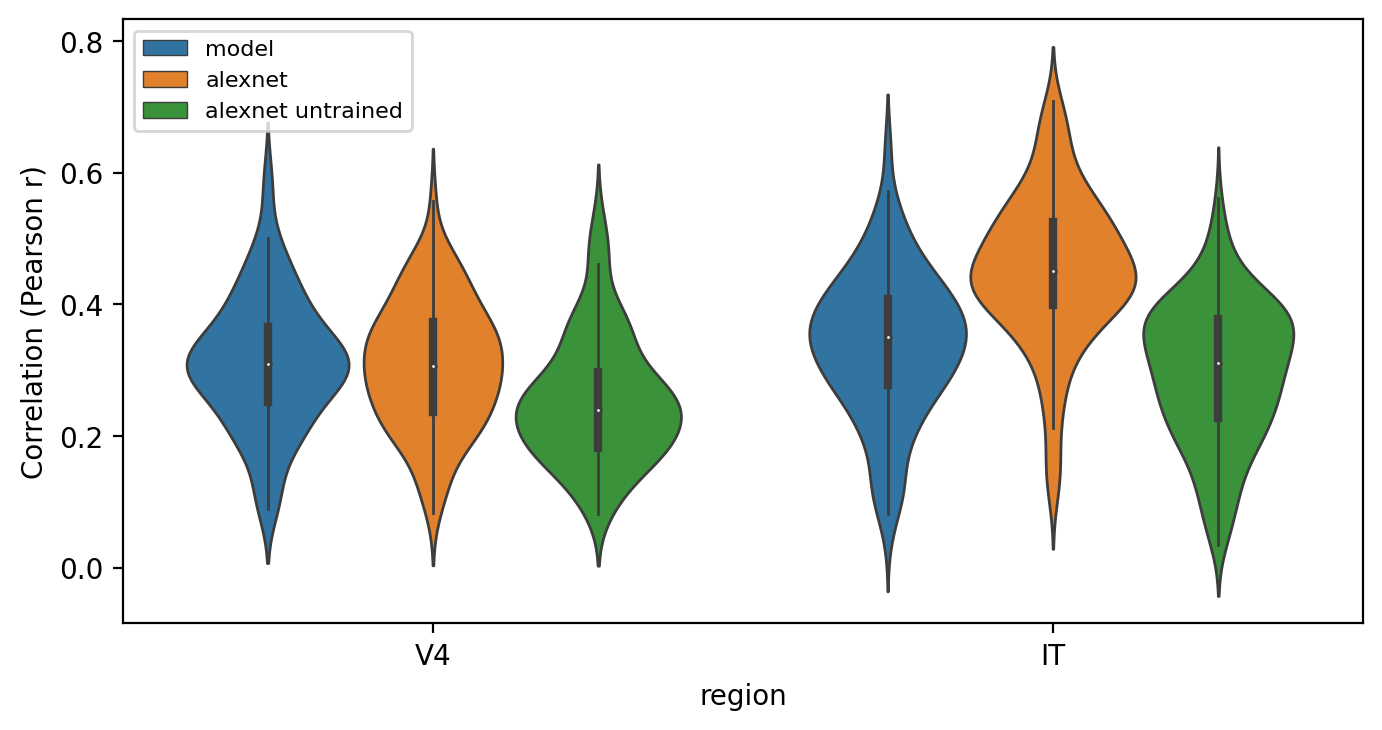

In [65]:

data_dict = {
    'model_final_mp_majajhong':['V4','IT'],
    'alexnet_mp_majajhong':['V4','IT'],
    'alexnet_untrained_mp_majajhong':['V4','IT'],
    
}

legend_name_dict = {
                    'model_final_mp_majajhong':'model',
                    'alexnet_mp_majajhong':'alexnet',
                    'alexnet_untrained_mp_majajhong':'alexnet untrained',
    
                   }



file_name = None#'majajhong_brainscore'

plot_data(data_dict,legend_name_dict,file_name,palette=None,regression='Ridge(alpha=0)',subject=None,show_legend=True)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1600x800 with 0 Axes>

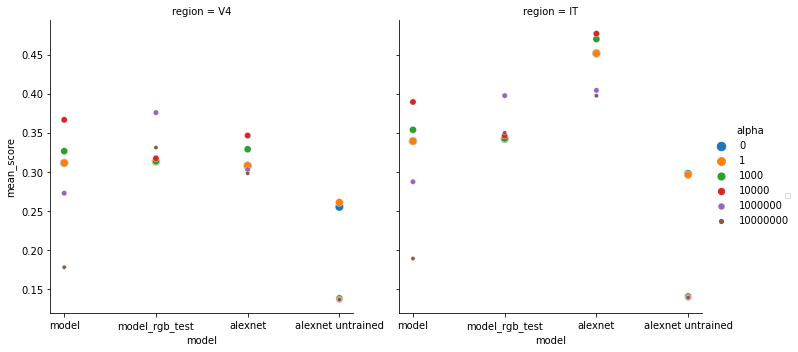

In [94]:
data_dict = {
    'model_final_mp_majajhong':['V4','IT'],
    #'model_final_mp_big_image_majajhong':['V4','IT'],
    'model_final_mp_rgb_test_majajhong':['V4','IT'],
    'alexnet_mp_majajhong':['V4','IT'],
    'alexnet_untrained_mp_majajhong':['V4','IT'],
    
}

legend_name_dict = {
                    'model_final_mp_majajhong':'model',
                    #'model_final_mp_big_image_majajhong':'model big images',
                    'model_final_mp_rgb_test_majajhong':'model_rgb_test',
                    'alexnet_mp_majajhong':'alexnet',
                    'alexnet_untrained_mp_majajhong':'alexnet untrained',
    
                   }


file_name = None #'majajhong_range_of_alpha'


plot_data_means(data_dict,legend_name_dict,file_name,alphas=[0,1,1000,10000,100000,1000000,10000000],show_legend=True)

# NSD

model_final_mp_shared_3l_naturalscenes_zscored_processed
model_final_mp_shared_naturalscenes_zscored_processed


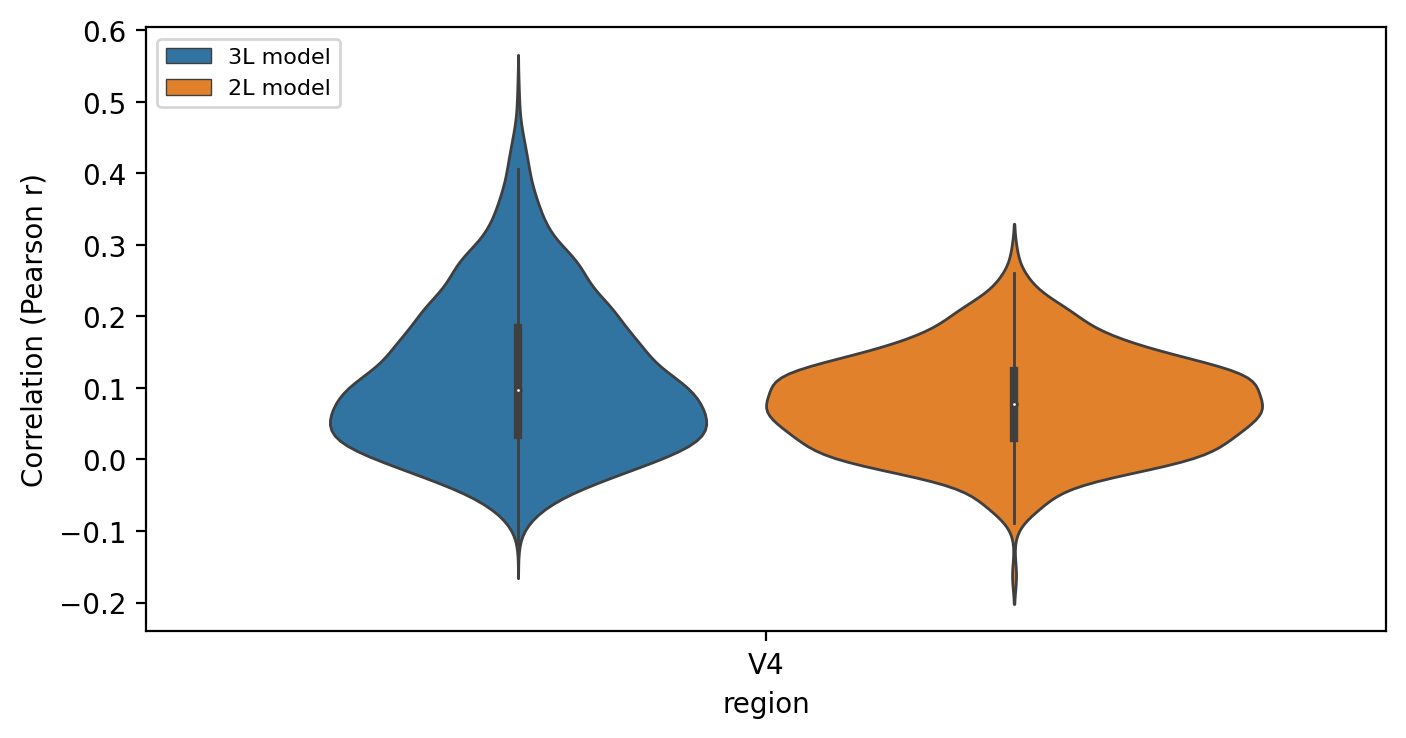

In [17]:

data_dict = {
    'model_final_mp_shared_3l_naturalscenes_zscored_processed':['V4'],
    'model_final_mp_shared_naturalscenes_zscored_processed':['V4'],

}

legend_name_dict = {
                   'model_final_mp_shared_3l_naturalscenes_zscored_processed':'3L model',
                    'model_final_mp_shared_naturalscenes_zscored_processed':'2L model'
}


file_name = None #'nsd_shared_unshared_pls'
plot_data(data_dict,legend_name_dict,file_name,palette=None,regression='Ridge(alpha=1000000)',subject=None,show_legend=True)

model_final_mp_3l_100000_all_naturalscenes_zscored_processed_V4


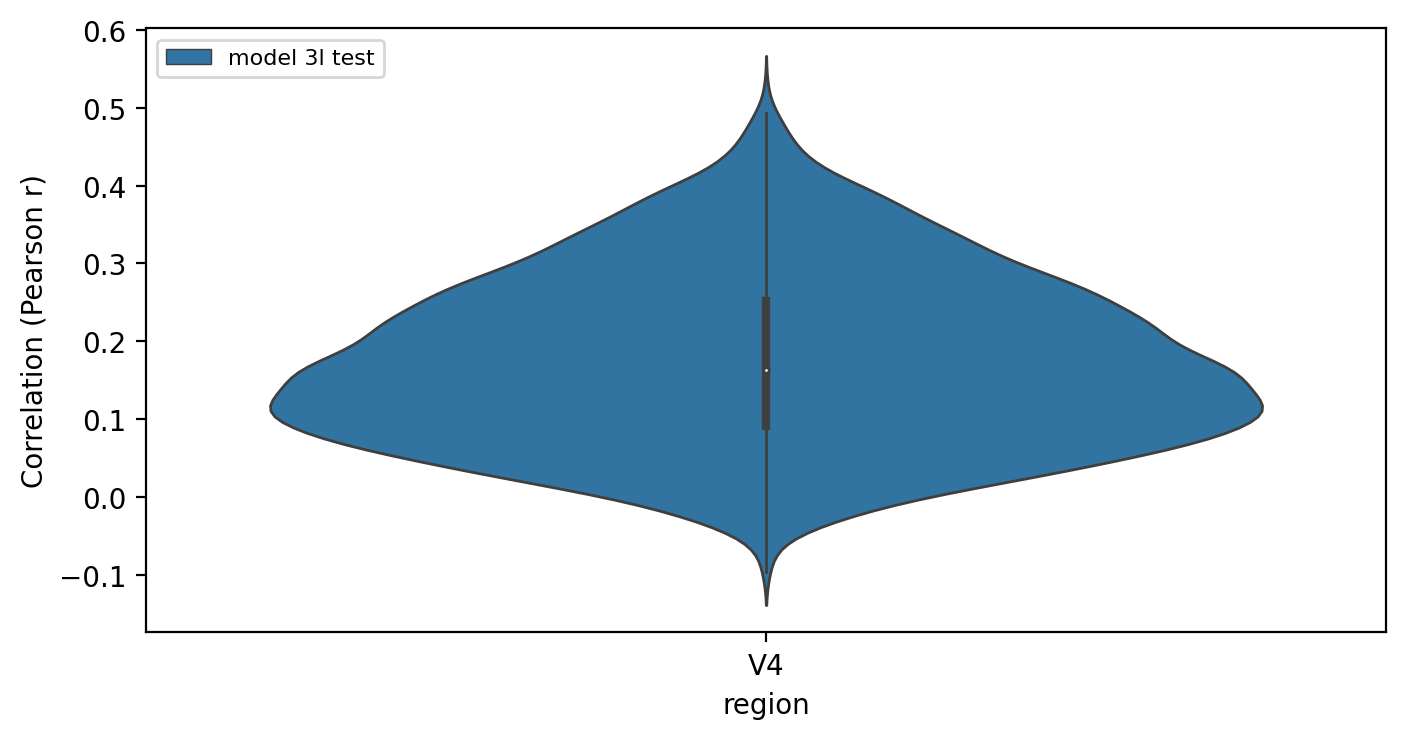

In [21]:


dataset = 'naturalscenes_zscored_processed'
data_dict = {
    # f'model_final_mp_all_{dataset}':['V4'],
    # f'model_final_mp_3l_all_{dataset}':['V4'],
    f'model_final_mp_3l_100000_all_{dataset}_V4':['V4']
    
}

legend_name_dict = {
                    # f'model_final_mp_all_{dataset}':'model 2l',
                    # f'model_final_mp_3l_all_{dataset}':'model 3l train',
                    f'model_final_mp_3l_100000_all_{dataset}_V4':'model 3l test'


                   }


file_name = None#'3layer_model_nsd_all'

alphas = [10**9] 
plot_data(data_dict,legend_name_dict,file_name,palette=None,regression='Ridge(alpha=1000000000)',subject=None,show_legend=True)

model_final_mp_100000_naturalscenes_zscored_processed_V4


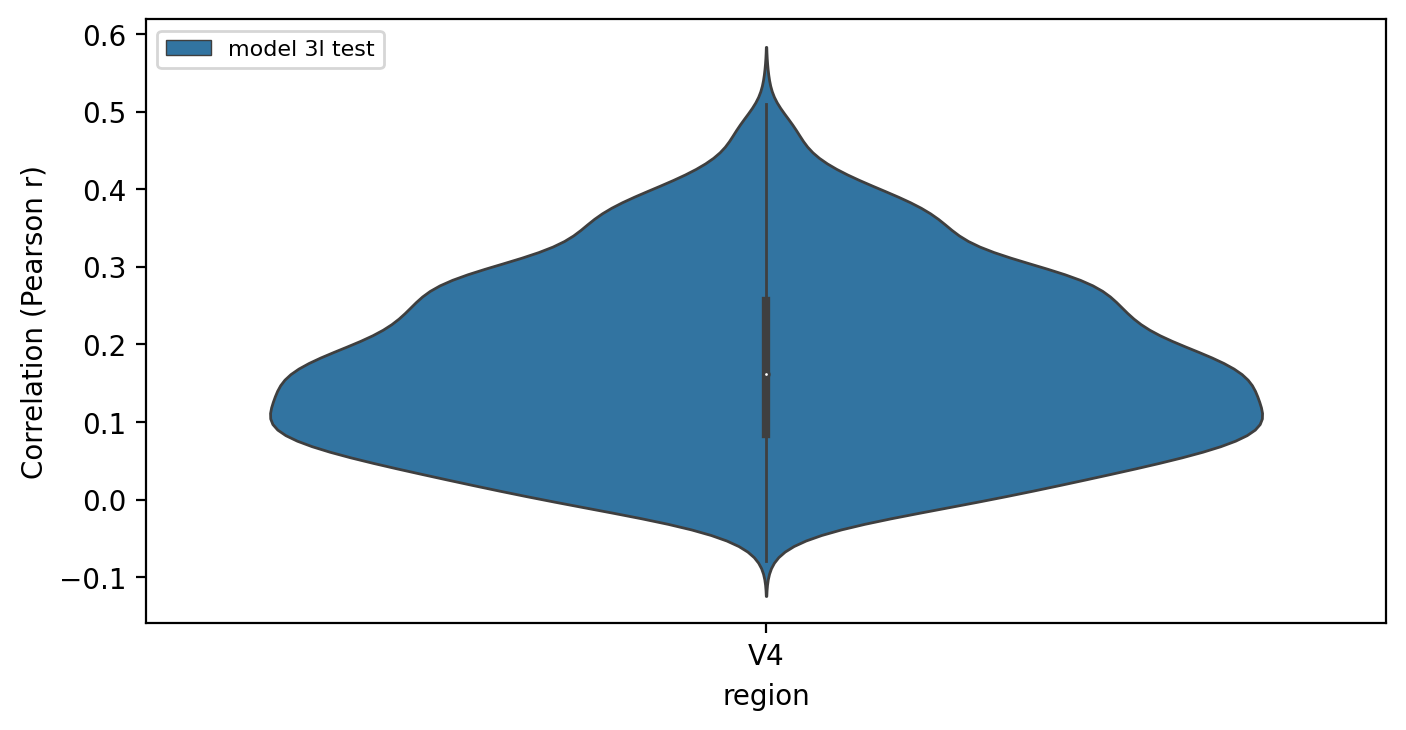

In [20]:


dataset = 'naturalscenes_zscored_processed'
data_dict = {
    f'model_final_mp_100000_{dataset}_V4':['V4']
    
}

legend_name_dict = {
                    f'model_final_mp_100000_{dataset}_V4':'model 3l test'


                   }


file_name = None#'3layer_model_nsd_all'

alphas = [10**5] 
plot_data(data_dict,legend_name_dict,file_name,palette=None,regression='Ridge(alpha=1000000)',subject=None,show_legend=True)

<Figure size 1600x800 with 0 Axes>

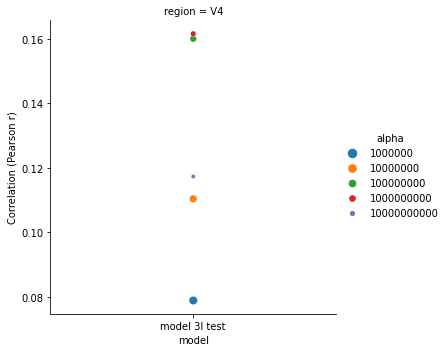

In [7]:


dataset = 'naturalscenes_zscored_processed'
data_dict = {
    # f'model_final_mp_all_{dataset}':['V4'],
    # f'model_final_mp_3l_all_{dataset}':['V4'],
    f'model_final_mp_3l_all_{dataset}':['V4']
    
}

legend_name_dict = {
                    # f'model_final_mp_all_{dataset}':'model 2l',
                    # f'model_final_mp_3l_all_{dataset}':'model 3l train',
                    f'model_final_mp_3l_all_{dataset}':'model 3l test'


                   }


file_name = None#'3layer_model_nsd_all'

alphas = [10**i for i in range(6,11)] 
plot_data_means(data_dict,legend_name_dict,file_name,alphas=alphas,show_legend=False)

In [ ]:


dataset = 'naturalscenes_zscored_processed'
data_dict = {
    f'model_final_mp_100000_{dataset}':['V4'],
    f'model_final_mp_100000_{dataset}_V4':['V4'],
}

legend_name_dict = {
                    f'model_final_mp_100000_{dataset}':'train',
                    f'model_final_mp_100000_{dataset}_V4':'validate',

                   }
#model_final_mp_100000_naturalscenes_zscored_processed_V4_Ridge(alpha=1000000)

file_name = '3layer_model_nsd_all'

plot_data(data_dict,legend_name_dict,file_name,palette=None,regression='Ridge(alpha=1000000)')

model_final_mp_100000_naturalscenes_zscored_processed
model_final_mp_100000_naturalscenes_zscored_processed_V4


In [16]:
d = xr.open_dataset(f'/data/atlas/neural_data/naturalscenes_zscored_processed/subject_0_V4_unshared_new.nc')

In [3]:
import xarray as xr
xr.DataArray

xarray.core.dataarray.DataArray

model_final_test_naturalscenes_zscored_processed
alexnet_test_naturalscenes_zscored_processed_new_neural_data
alexnet_untrained_test_naturalscenes_zscored_processed_new_neural_data


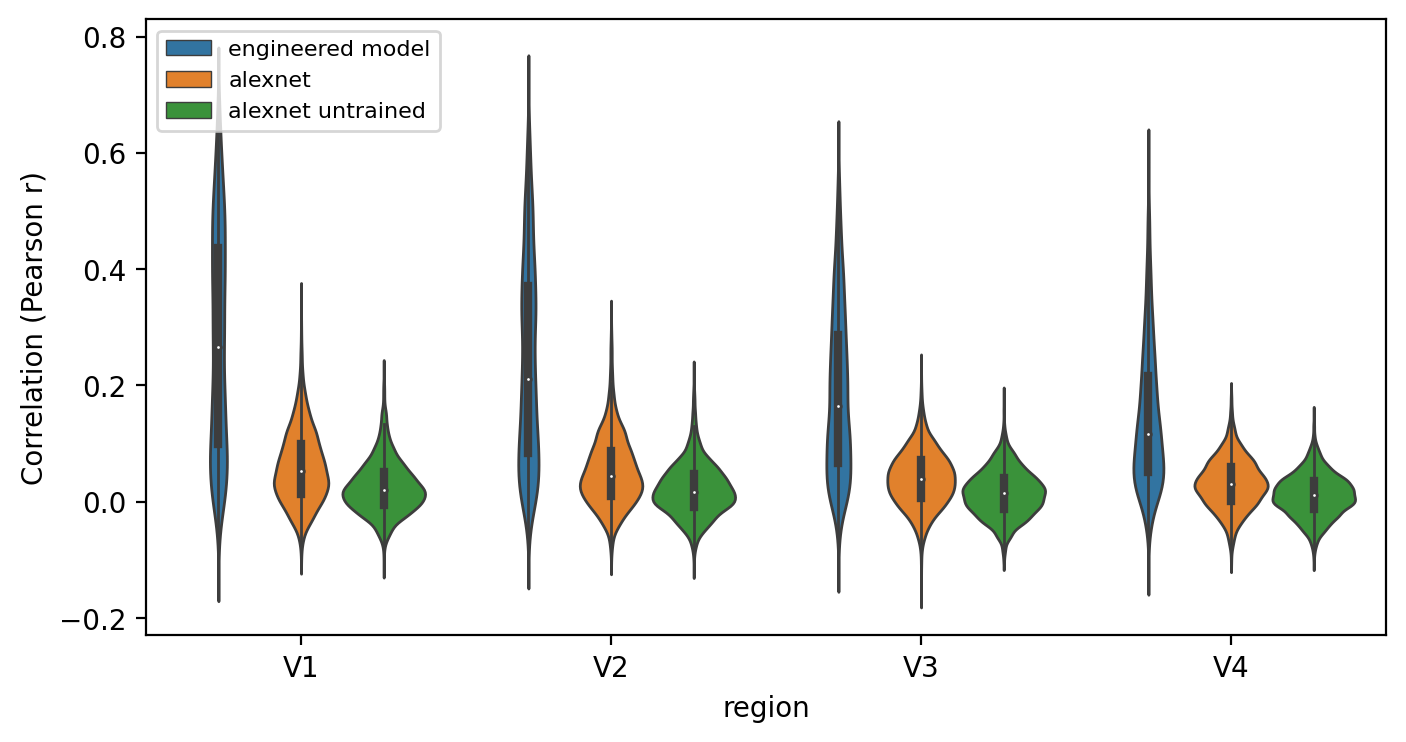

In [9]:
data_dict = {
    'model_final_test_naturalscenes_zscored_processed':['V1','V2','V3','V4'],
    'alexnet_test_naturalscenes_zscored_processed_new_neural_data':['V1','V2','V3','V4'],
    'alexnet_untrained_test_naturalscenes_zscored_processed_new_neural_data':['V1','V2','V3','V4']

}

legend_name_dict = {
                   'model_final_test_naturalscenes_zscored_processed':'engineered model',
                    'alexnet_test_naturalscenes_zscored_processed_new_neural_data':'alexnet',
                    'alexnet_untrained_test_naturalscenes_zscored_processed_new_neural_data':'alexnet untrained'
}


file_name = None #'nsd_shared_unshared_pls'
plot_data(data_dict,legend_name_dict,file_name,palette=None,regression='Ridge(alpha=0)',subject=None,show_legend=True)

<Figure size 1600x800 with 0 Axes>

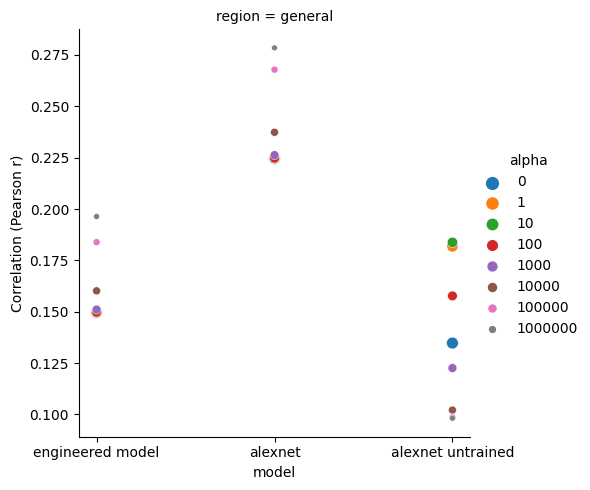

In [33]:
data_dict = {
    'model_final_test_naturalscenes_zscored_processed_imagenet_pca_nsdgeneral':['general'],
    'alexnet_test_naturalscenes_zscored_processed_imagenet_pca_nsdgeneral':['general'],
    'alexnet_untrained_test_naturalscenes_zscored_processed_imagenet_pca_nsdgeneral':['general']
}

legend_name_dict = {
                   'model_final_test_naturalscenes_zscored_processed_imagenet_pca_nsdgeneral':'engineered model',
                    'alexnet_test_naturalscenes_zscored_processed_imagenet_pca_nsdgeneral':'alexnet',
                    'alexnet_untrained_test_naturalscenes_zscored_processed_imagenet_pca_nsdgeneral':'alexnet untrained'

}

file_name = 'nsd_alpha_range_pca_results_general'

plot_data_means(data_dict,legend_name_dict,file_name)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1600x800 with 0 Axes>

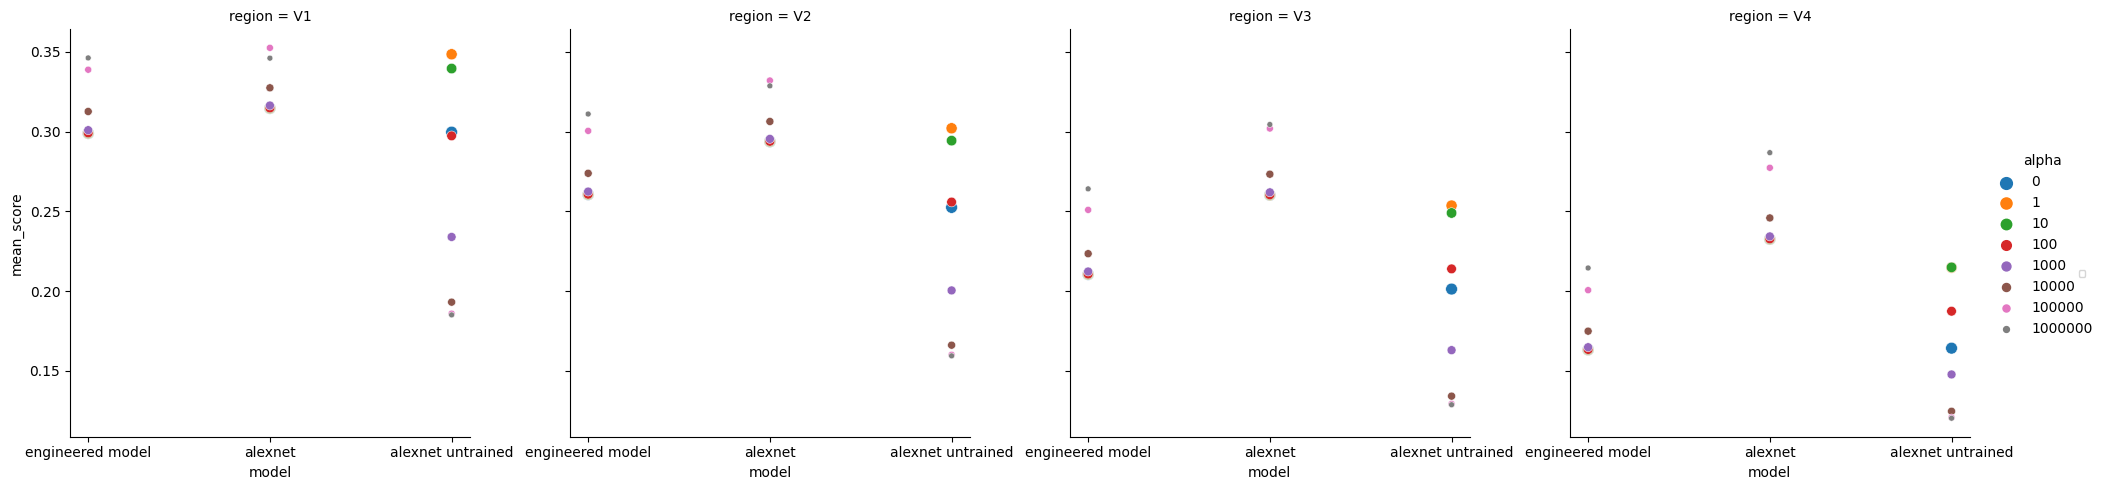

In [36]:
data_dict = {
    'model_final_test_naturalscenes_zscored_processed_imagenet_pca':['V1','V2','V3','V4'],
    'alexnet_test_naturalscenes_zscored_processed_imagenet_pca':['V1','V2','V3','V4'],
    'alexnet_untrained_test_naturalscenes_zscored_processed_imagenet_pca':['V1','V2','V3','V4']
}

legend_name_dict = {
                   'model_final_test_naturalscenes_zscored_processed_imagenet_pca':'engineered model',
                    'alexnet_test_naturalscenes_zscored_processed_imagenet_pca':'alexnet',
                    'alexnet_untrained_test_naturalscenes_zscored_processed_imagenet_pca':'alexnet untrained'

}

file_name = 'nsd_shared_unsharedalp_range_pca'

plot_data_means(data_dict,legend_name_dict,file_name,show_legend=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1600x800 with 0 Axes>

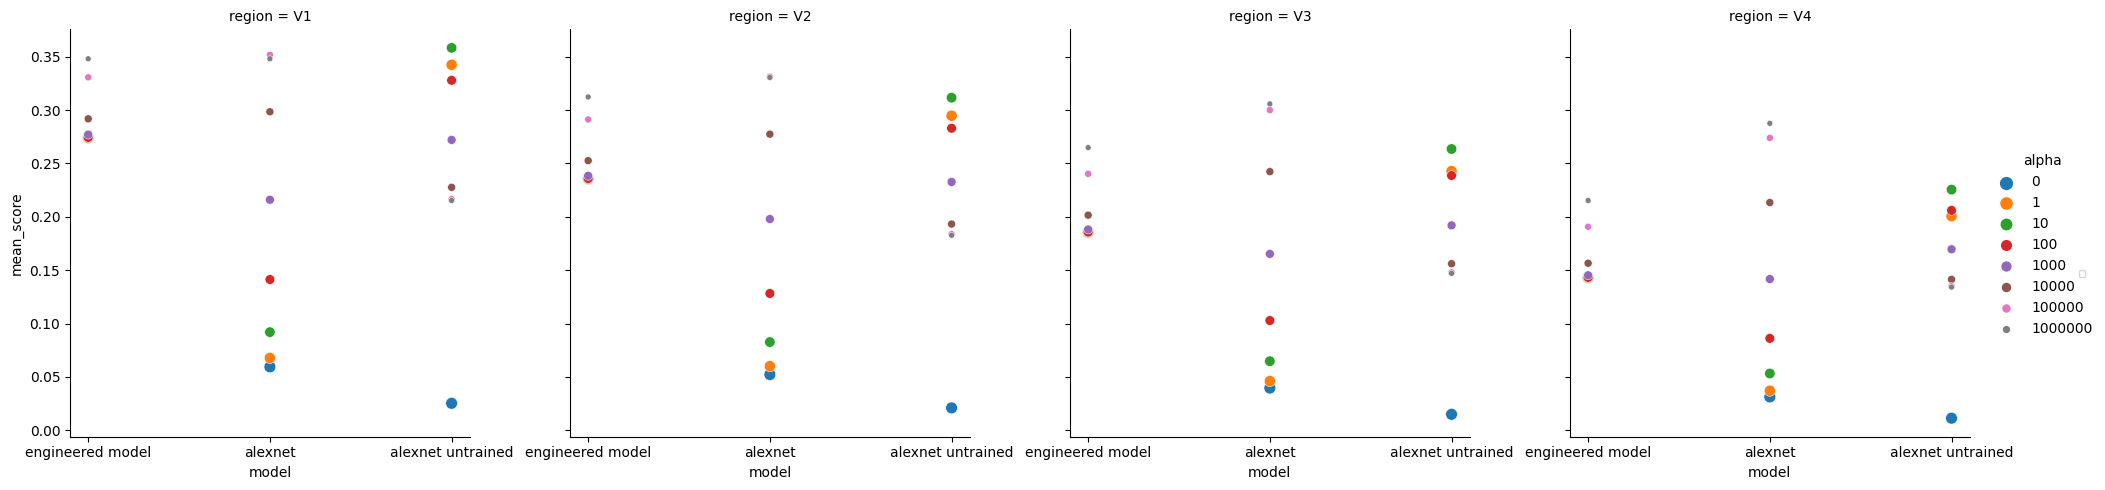

In [17]:
data_dict = {
    'model_final_test_naturalscenes_zscored_processed':['V1','V2','V3','V4'],
    'alexnet_test_naturalscenes_zscored_processed_new_neural_data':['V1','V2','V3','V4'],
    'alexnet_untrained_test_naturalscenes_zscored_processed_new_neural_data':['V1','V2','V3','V4']
}

legend_name_dict = {
                   'model_final_test_naturalscenes_zscored_processed':'engineered model',
                    'alexnet_test_naturalscenes_zscored_processed_new_neural_data':'alexnet',
                    'alexnet_untrained_test_naturalscenes_zscored_processed_new_neural_data':'alexnet untrained'

}

file_name = 'nsd_shared_unshared_alpha_range'

plot_data_means(data_dict,legend_name_dict,file_name,show_legend=True)

In [19]:
da = xr.open_dataset('/data/shared/brainio/brain-score/assy_dicarlo_MajajHong2015_public.nc')

In [21]:

# get shared stimulus ids
region = 'IT'#,'V4']
subject = 'Tito'#,'Chabo']
# saving each region from each subject separately 



# get data for shared images
da = da.where(da.animal.isin(subject),drop=True)

# get region's voxels
da_region = da.where((da.region == region), drop=True)

l = list(da_region.coords)
# remove all other regions
l.remove('image_id') # keep stimulus id
da_region = da_region.drop(l) # drop other coords
# get the average voxel response per image for region's voxels
da_region = da_region.groupby('image_id').mean()
da_region = da_region.rename({'image_id':'stimulus_id',
                              'dicarlo.MajajHong2015.public':'x'})


In [29]:
subject = 'Tito'
region = 'V4'
da = xr.open_dataset(f'/data/atlas/neural_data/majajhong/SUBJECT_{subject}_REGION_{region}')
da

<xarray.Dataset>
Dimensions:      (neuroid: 18, stimulus_id: 3200, time_bin: 1)
Coordinates:
  * stimulus_id  (stimulus_id) object '0015b49a190e9bce70b108b28dc1a0674d3c9e...
Dimensions without coordinates: neuroid, time_bin
Data variables:
    x            (stimulus_id, neuroid, time_bin) float32 ...

In [40]:
from collections import OrderedDict, defaultdict
from typing import Hashable, Union, Iterable

import os
import uuid
import itertools
import numpy as np
import xarray as xr
from xarray import DataArray, IndexVariable

from xarray import DataArray, IndexVariable
class DataAssembly(DataArray):
    """A DataAssembly represents a set of data a researcher wishes to work with for
    an analysis or benchmarking task.  """

    __slots__ = ()

    def __init__(self, *args, lazy_da: DataArray = None, **kwargs):
        if lazy_da is not None:
            # Lazily load from a file by copying over all attributes. This is a hideous solution,
            # but it is required because initializing using DataArray(data=data: DataArray) copies
            # over all the data by loading it into memory. This essentially copies the DataArray
            # that was loaded from disk by reference, but that's totally fine since that DataArray
            # will never be used anywhere else.
            assert len(args) == 0 and len(kwargs) == 0
            close = lazy_da._close     # gather_indexes will destroy the close hook, so store for later
            lazy_da = gather_indexes(lazy_da)
            lazy_da._close = close
            super(DataAssembly, self).__init__()
            for attr in lazy_da.__slots__:
                if hasattr(lazy_da, attr) and hasattr(self, attr) and attr != '__weakref__':
                    setattr(self, attr, getattr(lazy_da, attr))
        elif is_fastpath(*args, **kwargs):
            # DataArray.__init__ follows a very different code path if fastpath=True
            # gather_indexes is not necessary in those cases
            super(DataAssembly, self).__init__(*args, **kwargs)
        else:
            # We call gather_indexes so we can guarantee that DataAssemblies will always have all metadata as indexes.
            # set_index, and thus gather_indexes, cannot operate on self in-place, it can only return a new object.
            # We take advantage of the almost-idempotence of DataArray.__init__ to gather indexes on a temporary
            # object and then initialize self with that.
            temp = DataArray(*args, **kwargs)
            temp = gather_indexes(temp)
            super(DataAssembly, self).__init__(temp)
    def multi_groupby(self, group_coord_names, *args, **kwargs):
        if len(group_coord_names) < 2:
            return self.groupby(group_coord_names[0], *args, **kwargs)
        multi_group_name = "multi_group"
        dim = self._dim_of_group_coords(group_coord_names)
        tmp_assy = self._join_group_coords(dim, group_coord_names, multi_group_name)
        result = tmp_assy.groupby(multi_group_name, *args, **kwargs)
        return GroupbyBridge(result, self, dim, group_coord_names, multi_group_name)
    
    def _dim_of_group_coords(self, group_coord_names):
        dimses = [self.coords[coord_name].dims for coord_name in group_coord_names]
        dims = [dim for dim_tuple in dimses for dim in dim_tuple]
        if len(set(dims)) == 1:
            return dims[0]
        else:
            raise GroupbyError("All coordinates for grouping must be associated with the same single dimension.  ")

    def _join_group_coords(self, dim, group_coord_names, multi_group_name):
        class MultiCoord:
            # this is basically a list of key-values, but not treated as a list to avoid xarray complaints
            def __init__(self, values):
                self.values = tuple(values) if isinstance(values, list) else values

            def __eq__(self, other):
                return len(self.values) == len(other.values) and \
                       all(v1 == v2 for v1, v2 in zip(self.values, other.values))

            def __lt__(self, other):
                return self.values < other.values

            def __hash__(self):
                return hash(self.values)

            def __repr__(self):
                return repr(self.values)
            
        tmp_assy = self.copy()
        group_coords = [tmp_assy.coords[c].values.tolist() for c in group_coord_names]
        multi_group_coord = []
        for coords in zip(*group_coords):
            multi_group_coord.append(MultiCoord(coords))
        tmp_assy.coords[multi_group_name] = dim, multi_group_coord
        tmp_assy = tmp_assy.set_index(append=True, **{dim: multi_group_name})
        return tmp_assy


def walk_coords(assembly):
    """
    walks through coords and all levels, just like the `__repr__` function, yielding `(name, dims, values)`.
    """
    coords = {}

    for name in assembly.coords.variables:
        values = assembly.coords.variables[name]
        is_index = isinstance(values, IndexVariable)
        if is_index and values.level_names:
            for level in values.level_names:
                level_values = assembly.coords[level]
                yield level, level_values.dims, level_values.values
        else:
            yield name, values.dims, values.values
    return coords


def array_is_element(arr, element):
    return len(arr) == 1 and arr[0] == element

            
    
def is_fastpath(*args, **kwargs):
    """checks whether a set of args and kwargs would be interpreted by DataArray.__init__"""
    n = 7 # maximum length of args if all arguments to DataArray are positional (as of 0.16.1)
    return ("fastpath" in kwargs and kwargs["fastpath"]) or (len(args) >= n and args[n-1])


def gather_indexes(xr_data):
    """This is only necessary as long as xarray cannot persist MultiIndex to netCDF.  """
    coords_d = {}
    for dim in xr_data.dims:
        coords = coords_for_dim(xr_data, dim)
        if coords:
            coords_d[dim] = list(coords.keys())
    if coords_d:
        xr_data = xr_data.set_index(append=True, **coords_d)
    return xr_data



def coords_for_dim(xr_data, dim, exclude_indexes=True):
    result = OrderedDict()
    for key, value in xr_data.coords.variables.items():
        only_this_dim = value.dims == (dim,)
        exclude_because_index = exclude_indexes and isinstance(value, xr.IndexVariable)
        if only_this_dim and not exclude_because_index:
            result[key] = value
    return result

class GroupbyBridge(object):
    """Wraps an xarray GroupBy object to allow grouping on multiple coordinates.   """

    def __init__(self, groupby, assembly, dim, group_coord_names, multi_group_name):
        self.groupby = groupby
        self.assembly = assembly
        self.dim = dim
        self.group_coord_names = group_coord_names
        self.multi_group_name = multi_group_name

    def __getattr__(self, attr):
        result = getattr(self.groupby, attr)
        if callable(result):
            result = self.wrap_groupby(result)
        return result

    def wrap_groupby(self, func):
        def wrapper(*args, **kwargs):
            result = func(*args, **kwargs)
            if isinstance(result, type(self.assembly)):
                result = self.split_group_coords(result)
            return result

        return wrapper

    def split_group_coords(self, result):
        split_coords = [multi_coord.values for multi_coord in result.coords[self.multi_group_name].values]
        split_coords = list(map(list, zip(*split_coords)))  # transpose
        for coord_name, coord in zip(self.group_coord_names, split_coords):
            result.coords[coord_name] = (self.multi_group_name, coord)
        result_type = type(result)
        result = xr.DataArray(result).reset_index(self.multi_group_name, drop=True)
        result = result_type(result.set_index(append=True, **{self.multi_group_name: list(self.group_coord_names)}))
        result = result.rename({self.multi_group_name: self.dim})
        return result

def average_repetition(assembly):
    def avg_repr(assembly):
        presentation_coords = [coord for coord, dims, values in walk_coords(assembly)
                               if array_is_element(dims, 'presentation') and coord != 'repetition']
        assembly = assembly.multi_groupby(presentation_coords).mean(dim='presentation', skipna=True)
        return assembly

    return apply_keep_attrs(assembly, avg_repr)


def apply_keep_attrs(assembly, fnc):  # workaround to keeping attrs
    attrs = assembly.attrs
    assembly = fnc(assembly)
    assembly.attrs = attrs
    return assembly

In [41]:
subject = 'Tito'
region = 'IT'

In [43]:
# assembly = xr.open_dataarray('/data/shared/brainio/brain-score/assy_dicarlo_MajajHong2015_public.nc')
# assembly = DataAssembly(assembly)
# assembly = assembly.sel(region=region)

# # assembly = assembly.where((assembly.region == region), drop=True)
# assembly['region'] = 'neuroid', [region] * len(assembly['neuroid'])
# assembly = assembly.squeeze("time_bin")
# assembly.load()
# assembly = assembly.transpose('presentation', 'neuroid')
# assembly = average_repetition(assembly)
# assembly.sel(animal=subject)

In [44]:
import sys
sys.path.append('/home/akazemi3/Desktop/MB_Lab_Project/analysis/neural_data_regression')
from tools.regression import *
from sklearn.linear_model import Ridge
from brainio.assemblies import DataAssembly
import xarray as xr
import os

In [45]:
activations_data = torch.rand(100,500)
responses = torch.rand(100,50)
regression = Ridge(alpha=1)

In [97]:
subject = 'Tito'
region = 'V4'

activations_path = '/data/atlas/activations'
neural_data_path = '/data/atlas/neural_data'

activations_identifier = 'alexnet_untrained_test_majajhong'
activations_data = xr.open_dataset(os.path.join(activations_path,activations_identifier))    
#activations_data = activations_data.rename({'stimulus_id':'image_id'})



In [105]:
    
def get_image_labels(dataset,images):

    if 'majajhong' in dataset:
        mapping_df= pd.read_csv('/data/shared/brainio/brain-score/image_dicarlo_hvm-public.csv')[['image_file_name','image_id']]
        mapping_dict = {}
        for i in range(len(mapping_df)):
            mapping_dict[mapping_df.loc[i,'image_file_name']] = mapping_df.loc[i,'image_id']

        return [mapping_dict[os.path.basename(i)] for i in images] 

In [125]:
activations_data = xr.open_dataset('/home/akazemi3/.result_caching/model_tools.activations.core.from_paths/identifier=alexnet_untrained_test_dicarlo.MajajHong2015public.,stimuli_identifier=dicarlo.hvm-public.nc')
image_labels = get_image_labels('majajhong',list(x.stimulus_path_.values))

In [127]:
activations_data = activations_data.assign_coords({"image_id": image_labels})

In [132]:
activations_data

<xarray.Dataset>
Dimensions:                        (image_id: 3200, neuroid: 9216, stimulus_path: 3200)
Coordinates:
    stimulus_path_                 (stimulus_path) object '/home/akazemi3/.br...
    neuroid_num                    (neuroid) int64 0 1 2 3 ... 9213 9214 9215
    model                          (neuroid) object 'alexnet_untrained_test_d...
    layer                          (neuroid) object 'features.12' ... 'featur...
    channel                        (neuroid) int64 0 0 0 0 0 ... 255 255 255 255
    channel_x                      (neuroid) int64 0 0 0 0 0 0 1 ... 5 5 5 5 5 5
    channel_y                      (neuroid) int64 0 1 2 3 4 5 0 ... 0 1 2 3 4 5
    neuroid_id                     (neuroid) object 'alexnet_untrained_test_d...
  * image_id                       (image_id) <U40 'fb686729bff0586ad284167ec...
Dimensions without coordinates: neuroid, stimulus_path
Data variables:
    __xarray_dataarray_variable__  (stimulus_path, neuroid) float32 ...

In [128]:

assembly = xr.open_dataarray('/data/shared/brainio/brain-score/assy_dicarlo_MajajHong2015_public.nc')
assembly = DataAssembly(assembly)
assembly = assembly.sel(region=region)

# assembly = assembly.where((assembly.region == region), drop=True)
assembly['region'] = 'neuroid', [region] * len(assembly['neuroid'])
assembly = assembly.squeeze("time_bin")
assembly.load()
assembly = assembly.transpose('presentation', 'neuroid')
assembly = average_repetition(assembly)
assembly = assembly.sel(animal=subject)

In [133]:
CrossReg = CrossRegressedCorrelation(regression, pearsonr_brainscore)
CrossReg.__call__(source=DataAssembly(activations_data.to_array()),target=assembly)

ValueError: coordinate image_id has dimensions ('image_id',), but these are not a subset of the DataArray dimensions ('variable', 'stimulus_path', 'neuroid')

# Object2vec

In [62]:
data_dict = {'name':'object2vec','regions':['roi_EVC','roi_LOC']}
plot_data(data_dict)

TypeError: plot_data() missing 4 required positional arguments: 'legend_name_dict', 'file_name', 'alpha', and 'palette'

In [63]:
i = 0
batch= 100
l = []
activations_path = '/data/atlas/activations'
dataset = 'naturalscenes_zscored_processed'
model_name = 'engineered_model_final_100000'
activations_identifier = model_name + '_' + dataset



In [64]:
#################
shared_ids = list(xr.open_dataset('/data/atlas/activations/alexnet_naturalscenes').stimulus_id.values)

i = 0
batch= 100
l_test = []
for r in range(730):

    batch_activations = xr.open_dataset(os.path.join(activations_path,
                                                     f'{activations_identifier}_{i}_{i+batch}'))
    batch_test = batch_activations.where(batch_activations.stimulus_id.isin(shared_ids),drop=True)
    l_test.append(batch_test)
    i += batch
    print(i)

IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

In [ ]:
X_test = xr.concat(l_test,dim='presentation')
#######################
X_test = torch.Tensor(X_test['x'].values)
print(len(X_test))

In [ ]:
import torch 
import torchvision
alexnetmodel_1 = torchvision.models.alexnet(pretrained=False)
alexnetmodel = torchvision.models.alexnet(weights= None)


def _initialize_random(layer: torch.nn.Module, seed: int = 0) -> None:
    torch.manual_seed(seed)
    if isinstance(layer, torch.nn.Linear) or isinstance(layer, torch.nn.Conv2d):
        torch.nn.init.kaiming_normal_(layer.weight, nonlinearity="relu")
        if layer.bias is not None:
            layer.bias.data.fill_(0.01)

In [ ]:
alexnetmodel_1

In [6]:
alexnetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 